# Company's sales and marketing practices

##Objective

you will explore the relationship between your radio promotion budget and your sales.



##Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
data = pd.read_csv("marketing_sales_data.csv")

#Data Exploration

In [4]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [5]:
data.shape

(572, 5)

In [6]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


If you would like to read more about the `isna()` function,  feel free to refer to its documentation, available in the references section of this lab.

In [7]:
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [8]:
data.isna().any(axis=1).sum()

3

In [10]:
# drop the rows that contain missing values
data = data.dropna(axis=0)

In [11]:
data.isna().any(axis=1).sum()

0

### Check model assumptions.


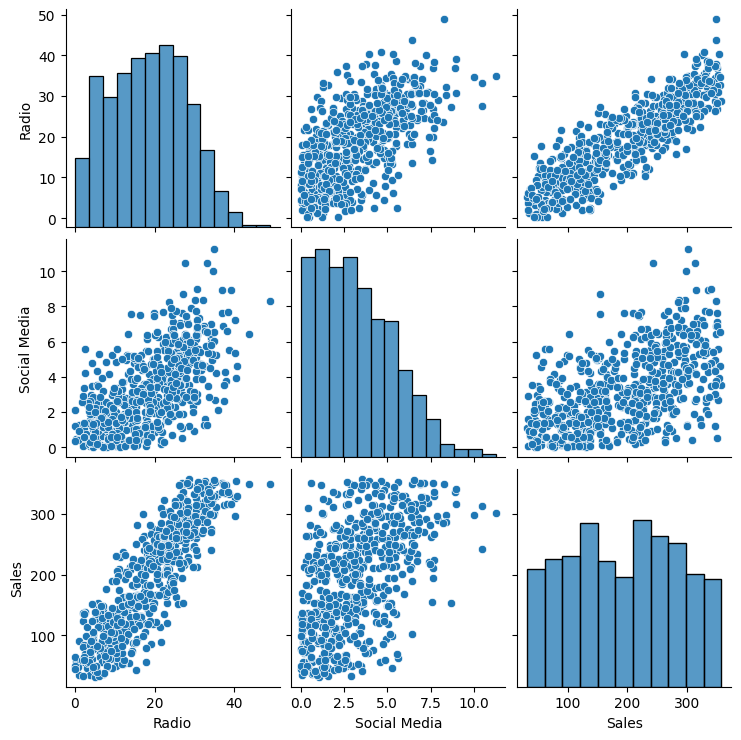

In [12]:
sns.pairplot(data)


the sales and radio reached the linearity.


##Model Building

Select the columns that are needed for the model.

In [13]:
# Select relevant columns
ols_data = data[["Radio", "Sales"]]

In [15]:
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [16]:
# Write the linear regression formula
ols_formula = "Sales ~ Radio"

Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [17]:
OLS = ols(formula = ols_formula, data = ols_data)

Create a linear regression model for the data and fit the model to the data.

In [19]:
model = OLS.fit()

##Results and Evaluation

In [20]:
# Get summary of results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.07e-176
Time:                        22:38:33   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analyze the information

there is a increase factor of 8.17, this means increase the budget , the sales will increase too.

### Finish checking model assumptions.


<Axes: xlabel='Radio', ylabel='Sales'>

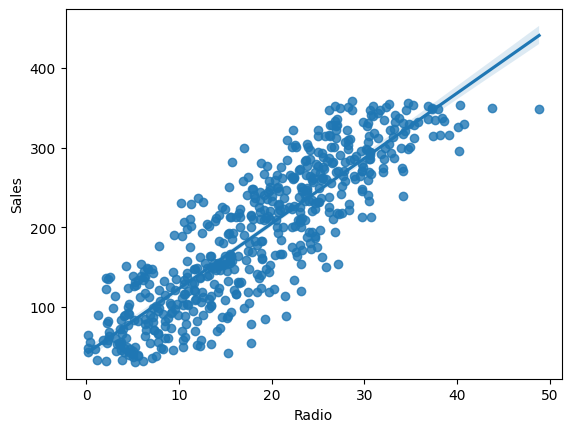

In [21]:
# Plot the OLS data with the best fit regression line
sns.regplot(x = "Radio", y = "Sales", data = ols_data)

we can assure there is a linear relationship between the 2 variables.

### Check the normality assumption.


In [22]:
# Get the residuals from the model
residuals = model.resid

Visualize the distribution of the residuals.

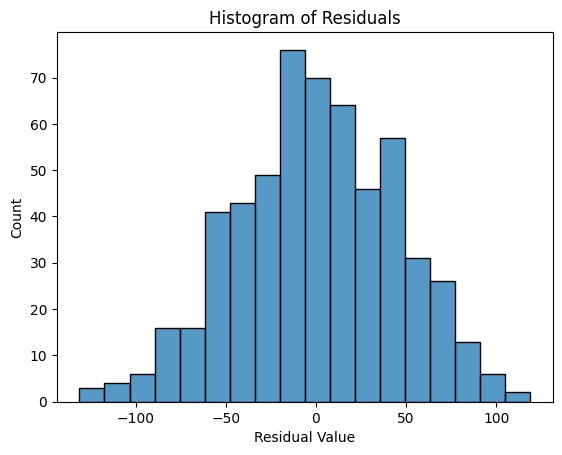

In [23]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

 the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.


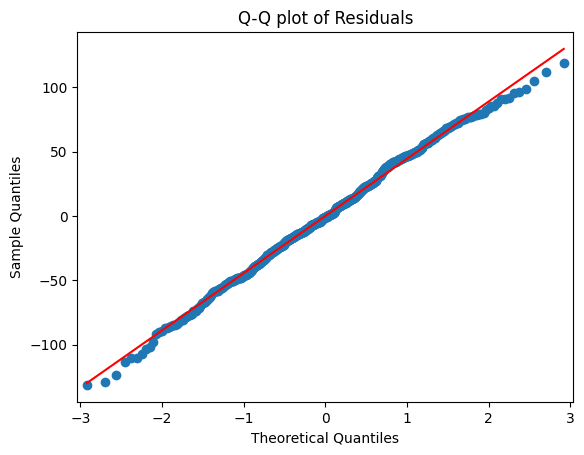

In [24]:
# Create a Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()


 the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

In [25]:
# Get fitted values
fitted_values = model.predict(ols_data["Radio"])

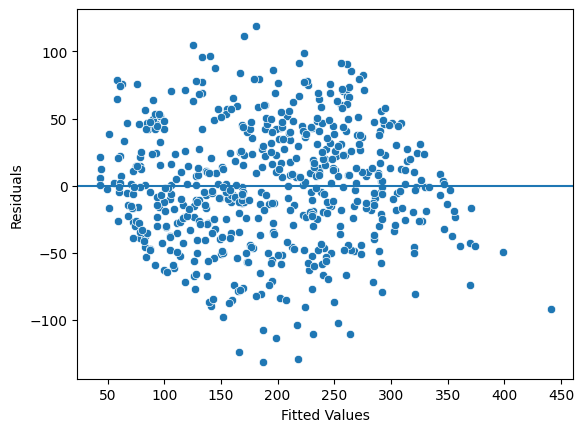

In [26]:
# Create a scatterplot of residuals against fitted values
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated.

## Conclusion

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.


